### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,6

### Functions

In [2]:
#function to get nigeria data from worldbank data then transpose
def WB_Transpose(table, col, col_content):
    table = pd.DataFrame(table[table[col] == col_content])
    table = pd.DataFrame(table.transpose())
    return table

#function to switch index
def switch_index(table, col):
    table.index.name= col
    table[col]=table.index
    table = table.reset_index(drop=True)
    return table

#function to treat worldbank time series data
def WB_Treat(table,table2,country):
    table = WB_Transpose(table, 'Country Name', country)
    table = switch_index(table, 'Year')
    table = pd.DataFrame(table[4:])
    table.columns = [table2, 'Year']
    table = table.reset_index(drop=True)
    return table

#function iterates throught csv and gets all the indicators from all the countries
def get_all(df, col, countries):
    col_names =  [col, 'Year','country']
    NEW = pd.DataFrame(columns = col_names)
    
    for i in countries:
        country = []
        Gdp_ = WB_Treat(df,col,i)
        for row in Gdp_['Year']:
            country.append(i)
        Gdp_['country'] = country    
        NEW = NEW.append(Gdp_)
    NEW = NEW.reset_index(drop=True)
    return NEW

#Function plots a graphical correlation matrix for each pair of columns in the dataframe.
def plot_corr(df, size):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap='summer')   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


### Read All CSV Files

In [3]:
Gdp = pd.read_csv('Gdp.csv', skiprows=4)
GdpGrowth = pd.read_csv('GdpGrowth.csv', skiprows=4)
Fdi = pd.read_csv('Fdi.csv', skiprows=4)
Forex = pd.read_csv('Forex.csv', skiprows=4)
Inflation = pd.read_csv('Inflation.csv', skiprows=4)
InterestRate = pd.read_csv('InterestRate.csv', skiprows=4)

In [4]:
Gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [5]:
Countries = GdpGrowth['Country Name']
Gdp = get_all(Gdp,'Gdp', Countries)
Fdi = get_all(Fdi,'Fdi', Countries)
Forex = get_all(Forex,'Forex', Countries)
Inflation = get_all(Inflation,'Inflation', Countries)
InterestRate = get_all(InterestRate,'InterestRate', Countries)
GdpGrowth = get_all(GdpGrowth,'GdpGrowth', Countries)

In [6]:
Fdi.head()

,Fdi,Year,country
0,NaN,1960,Aruba
1,NaN,1961,Aruba
2,NaN,1962,Aruba
3,NaN,1963,Aruba
4,NaN,1964,Aruba


### Merge Data

In [7]:
GdpPredictor = pd.merge(left=Gdp,right=GdpGrowth, on=['Year', 'country'],left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=Fdi, on=['Year', 'country'],left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=Forex, on=['Year', 'country'],left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=Inflation, on=['Year', 'country'],left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=InterestRate, on=['Year', 'country'],left_index=True,right_index=True)

GdpPredictor.head()

,Gdp,Year,country,GdpGrowth,Fdi,Forex,Inflation,InterestRate
0,NaN,1960,Aruba,NaN,NaN,NaN,NaN,NaN
1,NaN,1961,Aruba,NaN,NaN,NaN,NaN,NaN
2,NaN,1962,Aruba,NaN,NaN,NaN,NaN,NaN
3,NaN,1963,Aruba,NaN,NaN,NaN,NaN,NaN
4,NaN,1964,Aruba,NaN,NaN,NaN,NaN,NaN


In [8]:
GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 8 columns):
Gdp             11511 non-null object
Year            15576 non-null object
country         15576 non-null object
GdpGrowth       11094 non-null object
Fdi             6182 non-null object
Forex           9914 non-null object
Inflation       9499 non-null object
InterestRate    4018 non-null object
dtypes: object(8)
memory usage: 973.6+ KB


### Remove all NaN in Dataframe

In [9]:
GdpPredictor = GdpPredictor.dropna(how='any')
GdpPredictor = GdpPredictor.reset_index(drop=True)
GdpPredictor.head()                              

,Gdp,Year,country,GdpGrowth,Fdi,Forex,Inflation,InterestRate
0,1.32067e+09,1995,Aruba,1.24509,5.53073e+06,1.79,3.36139,12.7823
1,1.37989e+09,1996,Aruba,7.81443,-8.41341e+07,1.79,3.22529,13.8933
2,1.53184e+09,1997,Aruba,6.66662,-1.97598e+08,1.79,2.99995,5.93431
3,1.66536e+09,1998,Aruba,1.15447,-8.21788e+07,1.79,1.86949,3.31813
4,1.7228e+09,1999,Aruba,4.51406,-4.6933e+08,1.79,2.28037,14.3067


### Convert to correct datatypes

In [10]:
GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 8 columns):
Gdp             3329 non-null object
Year            3329 non-null object
country         3329 non-null object
GdpGrowth       3329 non-null object
Fdi             3329 non-null object
Forex           3329 non-null object
Inflation       3329 non-null object
InterestRate    3329 non-null object
dtypes: object(8)
memory usage: 208.1+ KB


In [11]:
GdpPredictor.Gdp = GdpPredictor['Gdp'].astype(float)
GdpPredictor.Year = GdpPredictor['Year'].astype(int)
GdpPredictor.GdpGrowth = GdpPredictor['GdpGrowth'].astype(float)
GdpPredictor.Fdi = GdpPredictor['Fdi'].astype(float)
GdpPredictor.Forex = GdpPredictor['Forex'].astype(float)
GdpPredictor.Inflation = GdpPredictor['Inflation'].astype(float)
GdpPredictor.InterestRate = GdpPredictor['InterestRate'].astype(float)

GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 8 columns):
Gdp             3329 non-null float64
Year            3329 non-null int64
country         3329 non-null object
GdpGrowth       3329 non-null float64
Fdi             3329 non-null float64
Forex           3329 non-null float64
Inflation       3329 non-null float64
InterestRate    3329 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 208.1+ KB


### Drop year & country from data

In [12]:
GdpPredictor = GdpPredictor.drop(columns = ['Year'])
GdpPredictor = GdpPredictor.drop(columns = ['country'])

### classify GdpGrowth as increase ( > 0) or decrease ( < 0)

In [13]:
GdpPredictor['GdpGrowth'] = GdpPredictor.GdpGrowth > 0
GdpPredictor['GdpGrowth'].head()

0    True
1    True
2    True
3    True
4    True
Name: GdpGrowth, dtype: bool

In [14]:
growth_map = {True : 1, False : 0}
GdpPredictor['GdpGrowth'] = GdpPredictor['GdpGrowth'].map(growth_map)
GdpPredictor['GdpGrowth'].head()

0    1
1    1
2    1
3    1
4    1
Name: GdpGrowth, dtype: int64

### Check Case distribution

Rare events are hard to predict


In [15]:
num_obs = len(GdpPredictor)
num_increase = len(GdpPredictor.loc[GdpPredictor['GdpGrowth'] > 0])
num_decrease = len(GdpPredictor.loc[GdpPredictor['GdpGrowth'] == 0])
print("Number of Increase cases:  {0} ({1:2.2f}%)".format(num_increase, (num_increase/num_obs) * 100))
print("Number of Decrease cases: {0} ({1:2.2f}%)".format(num_decrease, (num_decrease/num_obs) * 100))

Number of Increase cases:  2890 (86.81%)
Number of Decrease cases: 439 (13.19%)


In [16]:
ones = GdpPredictor[GdpPredictor['GdpGrowth'] == 1 ]
zeros = GdpPredictor[GdpPredictor['GdpGrowth'] == 0 ]
len(zeros)

439

In [17]:
ones = ones.sample(n=799)

In [18]:
from sklearn.utils import shuffle

col_names =  ['Gdp', 'GdpGrowth', 'Fdi', 'Forex', 'Inflation', 'InterestRate']
GdpPredictor = pd.DataFrame(columns = col_names)
GdpPredictor = GdpPredictor.append(zeros)
GdpPredictor = GdpPredictor.append(ones)
GdpPredictor = shuffle(GdpPredictor)
GdpPredictor = GdpPredictor.reset_index(drop=True)
GdpPredictor.head()

,Gdp,GdpGrowth,Fdi,Forex,Inflation,InterestRate
0,3.329765e+11,0,-3.305613e+09,3.710107,6.282774,-4.054208
1,7.419293e+08,0,-2.610000e+07,193.878333,5.980978,9.011665
2,5.494252e+09,1,4.848267e+05,71.093796,2.478820,4.772455
3,1.072050e+10,1,-5.261710e+08,1.000000,1.984598,-20.532260
4,1.831851e+10,1,-1.546000e+08,7.385610,5.213611,13.775604


In [19]:
GdpPredictor.GdpGrowth = GdpPredictor['GdpGrowth'].astype(int)
GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 6 columns):
Gdp             1238 non-null float64
GdpGrowth       1238 non-null int64
Fdi             1238 non-null float64
Forex           1238 non-null float64
Inflation       1238 non-null float64
InterestRate    1238 non-null float64
dtypes: float64(5), int64(1)
memory usage: 58.1 KB


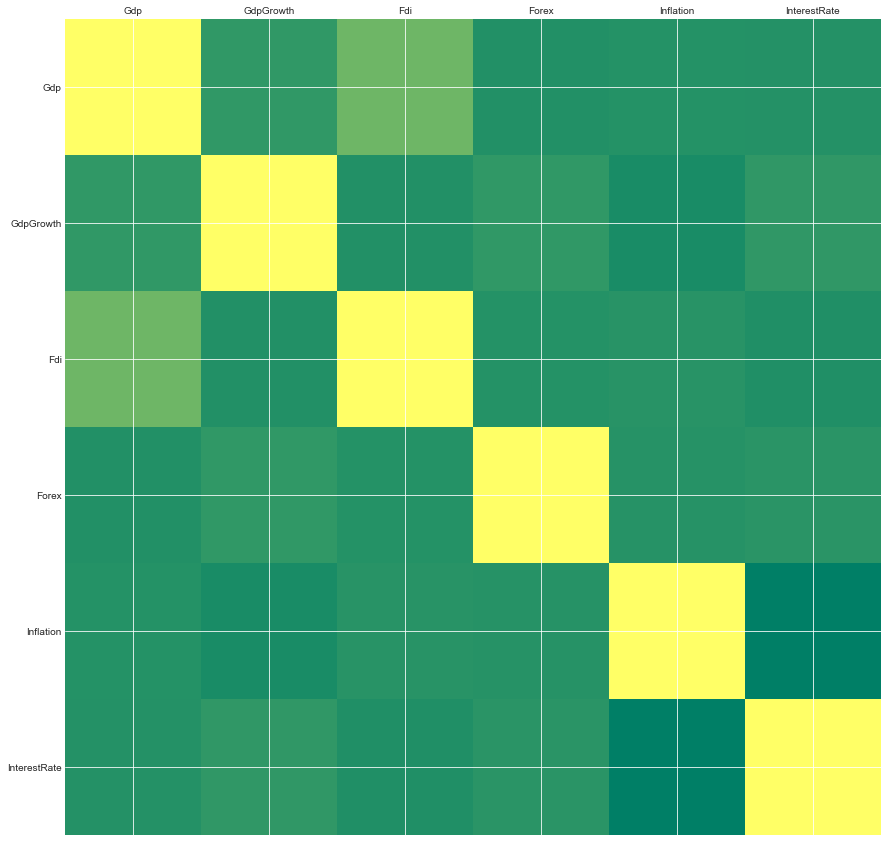

In [20]:
plot_corr(GdpPredictor, 15)

In [21]:
GdpPredictor.corr()

,Gdp,GdpGrowth,Fdi,Forex,Inflation,InterestRate
Gdp,1.000000,0.038887,0.322001,-0.027546,-0.015753,-0.019933
GdpGrowth,0.038887,1.000000,-0.028325,0.039057,-0.072045,0.035687
Fdi,0.322001,-0.028325,1.000000,-0.016756,-0.001118,-0.039669
Forex,-0.027546,0.039057,-0.016756,1.000000,-0.009637,0.009376
Inflation,-0.015753,-0.072045,-0.001118,-0.009637,1.000000,-0.189897
InterestRate,-0.019933,0.035687,-0.039669,0.009376,-0.189897,1.000000


### Visualise Data

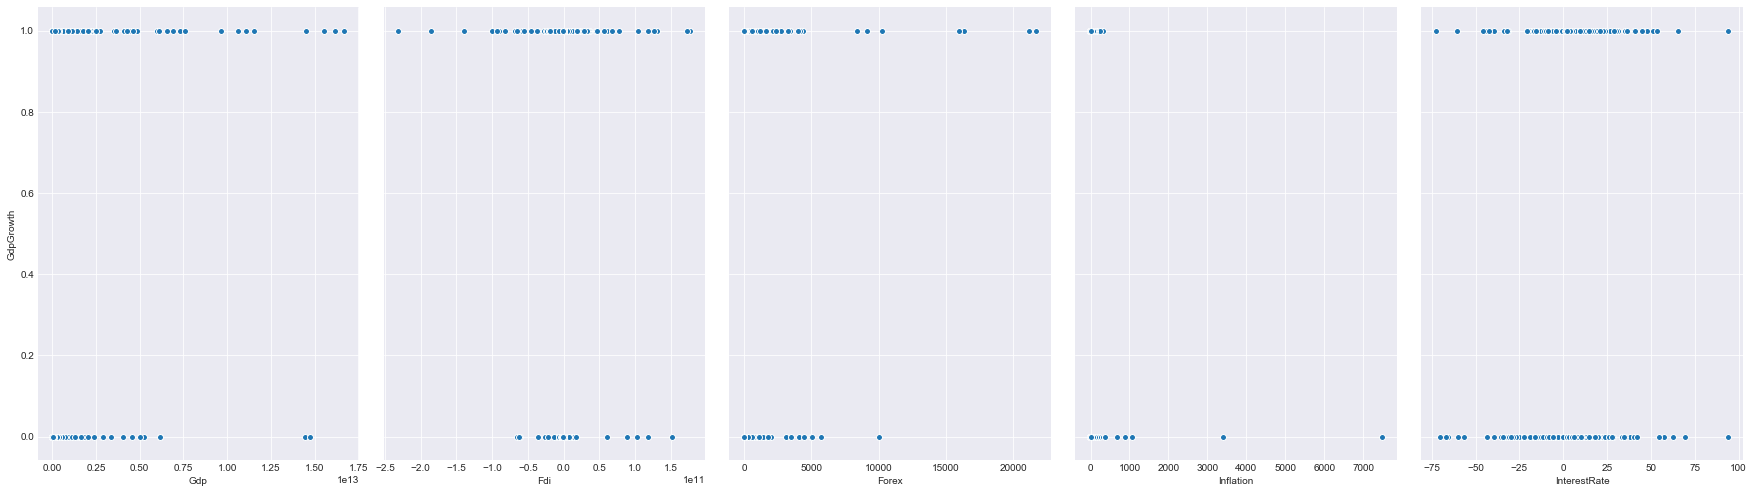

In [22]:
sns.pairplot(GdpPredictor, x_vars=['Gdp', 'Fdi', 'Forex', 'Inflation', 'InterestRate'], y_vars='GdpGrowth', size=7, aspect=0.7)


##### Spliting the data

75% for training & 25% for testing; because of the small amount of data


In [23]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['Gdp', 'Fdi', 'Forex', 'Inflation', 'InterestRate']
predicted_class_names = ['GdpGrowth']

X = GdpPredictor[feature_col_names].values     # predictor feature columns (5 X m)
y = GdpPredictor[predicted_class_names].values # predicted class column (1 X m)
split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.25 is 45%, 42 is the answer to everything

/Users/Ogochukwu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
print("{0:0.2f}% in training set".format((len(X_train)/len(GdpPredictor.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(GdpPredictor.index)) * 100))

79.97% in training set
20.03% in test set


### Feature Scaling (Naive Bayes does not include feature Scaling)
Note that y is not scaled as it is binary set of 1s and 0s

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Naive Bayes to the dataset
Naive bayes classifies by calculating the probability of being classified in a given category giving the feature (IVs)

In [26]:
from sklearn.naive_bayes import GaussianNB
NaiveB_classifier = GaussianNB()
NaiveB_classifier.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Predicting a new result with Naive Bayes
All models are wrong but some are useful...

In [27]:
y_pred_train = NaiveB_classifier.predict(X_train)
y_pred_test = NaiveB_classifier.predict(X_test)
y_pred_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

/Users/Ogochukwu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ones', 'zeros', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


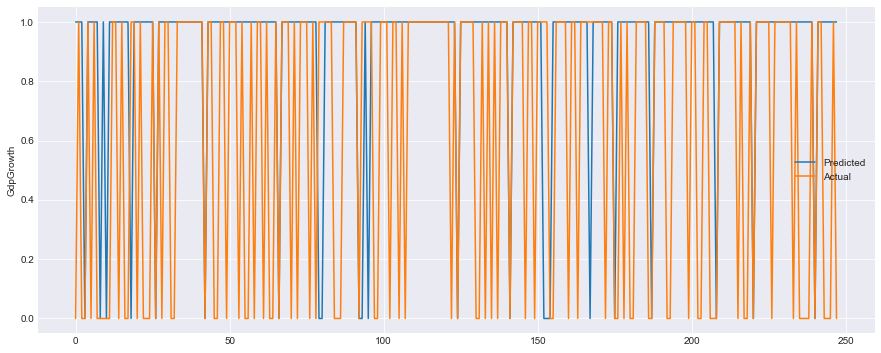

In [28]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_pred_test, label='Predicted')
plt.plot(y_test, label='Actual')
plt.ylabel('GdpGrowth')

plt.legend()
plt.show()

### Confusion Matrix

In [29]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_train, y_pred_train)))
print("")

print("Classification Report")
print(metrics.classification_report(y_train, y_pred_train))

Confusion Matrix
[[ 49 300]
 [ 37 604]]

Classification Report
             precision    recall  f1-score   support

          0       0.57      0.14      0.23       349
          1       0.67      0.94      0.78       641

avg / total       0.63      0.66      0.59       990



In [30]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test))

Confusion Matrix
[[ 15  75]
 [  8 150]]

Classification Report
             precision    recall  f1-score   support

          0       0.65      0.17      0.27        90
          1       0.67      0.95      0.78       158

avg / total       0.66      0.67      0.60       248



In [31]:
"""
from sklearn.grid_search import GridSearchCV
 
#rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [10,20,30,40,50,75,100,125],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30,35,40,45],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10,12,14,16,17,18,19]}
 
CV_RF = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, cv= 10)
CV_RF.fit(X_train, y_train.ravel())

CV_RF.best_params_
"""

'\nfrom sklearn.grid_search import GridSearchCV\n \n#rfc = RandomForestClassifier(n_jobs=-1, max_features=\'sqrt\', oob_score = True) \n \n# Use a grid over parameters of interest\nparam_grid = { \n           "n_estimators" : [10,20,30,40,50,75,100,125],\n           "max_depth" : [1, 5, 10, 15, 20, 25, 30,35,40,45],\n           "min_samples_leaf" : [1, 2, 4, 6, 8, 10,12,14,16,17,18,19]}\n \nCV_RF = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, cv= 10)\nCV_RF.fit(X_train, y_train.ravel())\n\nCV_RF.best_params_\n'

### Fitting Kernel SVM to the dataset

In [37]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='rbf', random_state=42)
SVC_classifier.fit(X_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

### Predicting a new result with Kernel SVM 
All models are wrong but some are useful...

In [38]:
y_pred_train = SVC_classifier.predict(X_train)
y_pred_test = SVC_classifier.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Populating the interactive namespace from numpy and matplotlib


/Users/Ogochukwu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


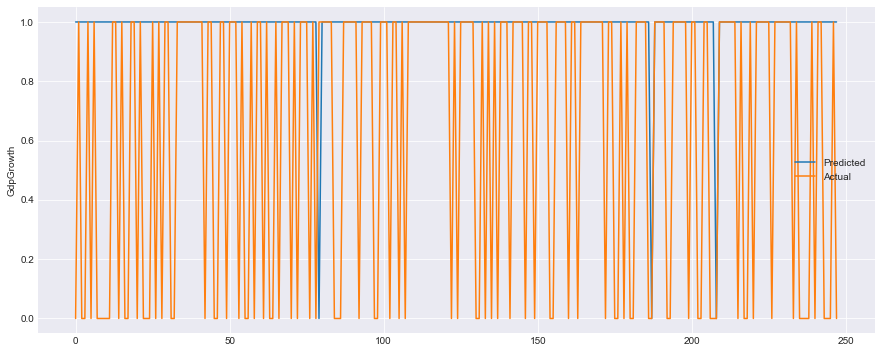

In [39]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_pred_test, label='Predicted')
plt.plot(y_test, label='Actual')
plt.ylabel('GdpGrowth')

plt.legend()
plt.show()

### Confusion Matrix

In [40]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_train, y_pred_train)))
print("")

print("Classification Report")
print(metrics.classification_report(y_train, y_pred_train))

Confusion Matrix
[[ 28 321]
 [  8 633]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.08      0.15       349
          1       0.66      0.99      0.79       641

avg / total       0.70      0.67      0.57       990



In [41]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test))

Confusion Matrix
[[  2  88]
 [  1 157]]

Classification Report
             precision    recall  f1-score   support

          0       0.67      0.02      0.04        90
          1       0.64      0.99      0.78       158

avg / total       0.65      0.64      0.51       248

